<a href="https://colab.research.google.com/github/deeksha-byte/Machine-Learning/blob/main/Linear_regression_in_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# # data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# #Removing Null Values from the dataset
# data_df = pd.DataFrame(df, )
# dataset= data_df.dropna()

# dataset

In [20]:
# url = "http://lib.stat.cmu.edu/datasets/boston"
# dataset = pd.read_csv(url, delim_whitespace=True, header=None)

# # Assign column names
# column_names = [
#     "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
#     "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
# ]
# dataset.columns = column_names




# # Download the dataset locally
# url = "http://lib.stat.cmu.edu/datasets/boston"
# data_file = "boston_dataset.txt"
# df = pd.read_csv(url, delim_whitespace=True, header=None)
# df.to_csv(data_file, index=False, header=None)

# # Read the downloaded dataset
# dataset = pd.read_csv(data_file, header=None)

# # Assign column names
# column_names = [
#     "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
#     "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
# ]
# dataset.columns = column_names

# # Print the DataFrame
# print(dataset.head())




# Modified version of the Boston Housing dataset
url = "https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv"

# Read the dataset using read_csv()
dataset = pd.read_csv(url)

# Print the DataFrame
dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
#independent(y) and dependent_features(x) -- divide the data
y=dataset.medv
x = dataset.drop("medv", axis=1)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [22]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [23]:

# x_train is standardized using fit transform and x_test is standardized using transform and not the output feature
# standardizing the dataset -- to get the good output model
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [24]:
x_train = scalar.fit_transform(x_train)
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [46]:
x_test = scalar.transform(x_test)
x_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.46684151, -0.52749891, -1.75430529, ..., -8.44094644,
        -4.13918731, -1.8159044 ],
       [-0.467354  , -0.44902113, -1.70514771, ..., -8.24404657,
        -4.1390015 , -1.9251358 ],
       [-0.46663907, -0.52749891, -1.26085482, ..., -7.7517969 ,
        -4.13990268, -1.63689177],
       ...,
       [-0.46053112, -0.52749891, -1.7095219 , ..., -8.28342654,
        -4.14097905, -1.90332917],
       [-0.38723778, -0.52749891, -1.46165105, ..., -7.73210691,
        -4.1783813 , -1.67356656],
       [-0.32424582, -0.52749891, -1.46165105, ..., -7.73210691,
        -4.14011371, -1.66920524]])

In [26]:
# since we have multiple variables this will be multi linear regression
from sklearn.linear_model import LinearRegression
#cross validation -- training data ko multiple  train sets mein we will divide and we will cross validate each of it and each cross validate has a different accuracy
#and finally we will combine it and find mean of it and that will be the final output
from sklearn.model_selection import cross_val_score

In [37]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [38]:
mean_sqrd_error = cross_val_score(regression, x_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
mean_sqrd_error

array([-20.96899446, -28.56556055, -48.78676527, -17.90181938,
       -27.86935858, -24.85480776, -18.65321599, -18.02764879,
       -13.94804652, -35.9303906 ])

In [39]:
np.mean(mean_sqrd_error)

-25.55066079166079

In [40]:
#prediction
reg_pred = regression.predict(x_test)

In [42]:
reg_pred
#compare this with ytest data to check whether it is correct or not

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

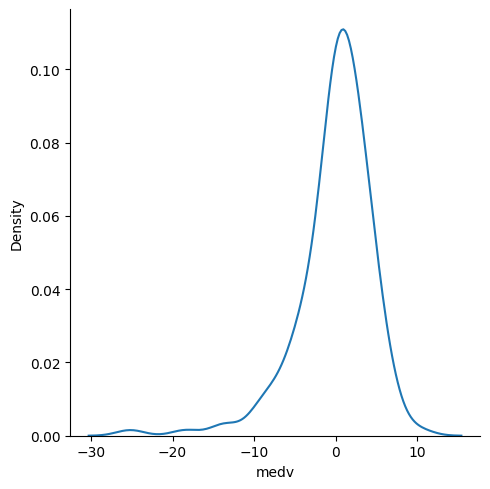

In [44]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')
# variance is very less btwen reg_pred and y_test it is btwen 10 and -10 and remaining outliers unka high hai -- shows model has done good prediction

In [45]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.6693702691495593